In [2]:
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd

In [3]:

#https://stackoverflow.com/questions/20681297/vector-autoregressive-model-fitting-with-scikit-learn
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#https://blog.devgenius.io/implementing-vector-autoregression-from-scratch-with-python-b12eedbf35ad
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff

#Bayesian VAR
#https://github.com/joergrieger/pybvar

In [4]:
#RMSE loss function

In [9]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_2wk_lag,overall_attention_score_2wk_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag
date,,,,,,,,
01/06/2021,41.3202,0.730667,2.460,0.05,99.875276,11.2,82.9,17915.4
02/06/2021,38.0270,1.044432,2.440,0.06,99.875276,11.2,82.9,17915.4
03/06/2021,34.6892,0.843912,2.420,0.06,99.875276,11.2,82.9,17915.4
04/06/2021,32.3695,0.509602,2.400,0.06,99.875276,11.2,82.9,17915.4
05/06/2021,31.8013,0.534556,2.400,0.07,99.875276,11.2,82.9,17915.4
...,...,...,...,...,...,...,...,...
27/05/2022,6.3381,4.212784,2.630,0.06,155.100579,5.5,58.4,20235.1
28/05/2022,-28.2659,4.391888,2.630,0.05,155.100579,5.5,58.4,20235.1
29/05/2022,-8.3638,2.894643,2.630,0.05,155.100579,5.5,58.4,20235.1


In [10]:
#train_df = train.iloc[:,4:]
train_df

,overall_sentiment_score_2wk_lag,overall_attention_score_2wk_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag
date,,,,,,,,
01/06/2021,41.3202,0.730667,2.460,0.05,99.875276,11.2,82.9,17915.4
02/06/2021,38.0270,1.044432,2.440,0.06,99.875276,11.2,82.9,17915.4
03/06/2021,34.6892,0.843912,2.420,0.06,99.875276,11.2,82.9,17915.4
04/06/2021,32.3695,0.509602,2.400,0.06,99.875276,11.2,82.9,17915.4
05/06/2021,31.8013,0.534556,2.400,0.07,99.875276,11.2,82.9,17915.4
...,...,...,...,...,...,...,...,...
27/05/2022,6.3381,4.212784,2.630,0.06,155.100579,5.5,58.4,20235.1
28/05/2022,-28.2659,4.391888,2.630,0.05,155.100579,5.5,58.4,20235.1
29/05/2022,-8.3638,2.894643,2.630,0.05,155.100579,5.5,58.4,20235.1


In [11]:
#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [142]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


In [19]:
#Visualising time series

In [11]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = train_df[train_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(train_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fcae1f7b730> (for post_execute):


KeyboardInterrupt: 

In [147]:
#Granger causality test

In [148]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


In [9]:
test_df

,T10YIE,unemp,int_rate,michigan_sentiment,overall_sentiment_score,overall_attention_score
date,,,,,,
12/05/2021,2.540000,5.5,0.06,82.9,26.4459,3.900597
13/05/2021,2.510000,5.5,0.06,82.9,51.3641,2.348224
14/05/2021,2.510000,5.5,0.06,82.9,48.4431,1.156789
15/05/2021,2.521818,5.5,0.06,82.9,17.4456,0.903695
16/05/2021,2.521818,5.5,0.06,82.9,28.1433,0.947890
...,...,...,...,...,...,...
27/05/2022,2.630000,3.4,0.83,58.4,8.4403,2.447695
28/05/2022,2.521818,3.4,0.83,58.4,18.5019,2.114690
29/05/2022,2.521818,3.4,0.83,58.4,24.0466,1.742053


In [13]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(train_df, variables = train_df.columns)  

,overall_sentiment_score_2wk_lag_x,overall_attention_score_2wk_lag_x,BEIR_x,interest_rate_1yr_lag_x,commodities_1yr_lag_x,UNRATENSA_1yr_lag_x,UMCSENT_2wk_lag_x,WM2NS_1yr_lag_x
overall_sentiment_score_2wk_lag_y,1.0000,0.0000,0.0001,0.0007,0.0000,0.0000,0.0000,0.0000
overall_attention_score_2wk_lag_y,0.0014,1.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
BEIR_y,0.1121,0.0299,1.0000,0.2165,0.1209,0.0434,0.0020,0.0525
interest_rate_1yr_lag_y,0.0001,0.0001,0.0053,1.0000,0.0000,0.0004,0.0000,0.0000
commodities_1yr_lag_y,0.3665,0.0000,0.2413,0.2642,1.0000,0.4093,0.7968,0.0083
UNRATENSA_1yr_lag_y,0.5191,0.1856,0.4411,0.0425,0.8691,1.0000,0.2437,0.0375
UMCSENT_2wk_lag_y,0.0322,0.7399,0.2582,0.9392,0.0240,0.0204,1.0000,0.0461
WM2NS_1yr_lag_y,0.1062,0.0000,0.0458,0.1279,0.0206,0.0061,0.0018,1.0000


In [14]:
#Cointegration test

In [16]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(train_df)
#cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
overall_sentiment_score_2wk_lag ::  167.77    > 143.6691  =>   True
overall_attention_score_2wk_lag ::  114.62    > 111.7797  =>   True
BEIR   ::  78.47     > 83.9383   =>   False
interest_rate_1yr_lag ::  50.87     > 60.0627   =>   False
commodities_1yr_lag ::  33.98     > 40.1749   =>   False
UNRATENSA_1yr_lag ::  18.52     > 24.2761   =>   False
UMCSENT_2wk_lag ::  7.94      > 12.3212   =>   False
WM2NS_1yr_lag ::  0.27      > 4.1296    =>   False


In [17]:
#Train test split

In [18]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]

In [19]:
df_train
#df_test1

,overall_sentiment_score_2wk_lag,overall_attention_score_2wk_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag
date,,,,,,,,
01/06/2021,41.3202,0.730667,2.46,0.05,99.875276,11.2,82.9,17915.4
02/06/2021,38.0270,1.044432,2.44,0.06,99.875276,11.2,82.9,17915.4
03/06/2021,34.6892,0.843912,2.42,0.06,99.875276,11.2,82.9,17915.4
04/06/2021,32.3695,0.509602,2.40,0.06,99.875276,11.2,82.9,17915.4
05/06/2021,31.8013,0.534556,2.40,0.07,99.875276,11.2,82.9,17915.4
...,...,...,...,...,...,...,...,...
26/04/2022,11.3230,9.070342,2.85,0.07,145.041207,5.7,65.2,20150.2
27/04/2022,-17.5748,7.017218,2.88,0.07,145.041207,5.7,65.2,20150.2
28/04/2022,-1.6031,4.326948,2.97,0.07,145.041207,5.7,65.2,20150.2


In [20]:
#Stationarity test

In [21]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [22]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

    Augmented Dickey-Fuller Test on "overall_sentiment_score_2wk_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.019
 No. Lags Chosen       = 8
 Critical value 1%     = -3.451
 Critical value 5%     = -2.87
 Critical value 10%    = -2.572
 => P-Value = 0.0332. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "overall_attention_score_2wk_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8912
 No. Lags Chosen       = 5
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0464. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has u

In [23]:
train_df_differenced = df_train.diff().dropna()

In [24]:
for name, column in train_df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "overall_sentiment_score_2wk_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.629
 No. Lags Chosen       = 9
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "overall_attention_score_2wk_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.8314
 No. Lags Chosen       = 11
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [25]:
df_train

,overall_sentiment_score_2wk_lag,overall_attention_score_2wk_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag
date,,,,,,,,
01/06/2021,41.3202,0.730667,2.46,0.05,99.875276,11.2,82.9,17915.4
02/06/2021,38.0270,1.044432,2.44,0.06,99.875276,11.2,82.9,17915.4
03/06/2021,34.6892,0.843912,2.42,0.06,99.875276,11.2,82.9,17915.4
04/06/2021,32.3695,0.509602,2.40,0.06,99.875276,11.2,82.9,17915.4
05/06/2021,31.8013,0.534556,2.40,0.07,99.875276,11.2,82.9,17915.4
...,...,...,...,...,...,...,...,...
26/04/2022,11.3230,9.070342,2.85,0.07,145.041207,5.7,65.2,20150.2
27/04/2022,-17.5748,7.017218,2.88,0.07,145.041207,5.7,65.2,20150.2
28/04/2022,-1.6031,4.326948,2.97,0.07,145.041207,5.7,65.2,20150.2


In [26]:
train_df_differenced

,overall_sentiment_score_2wk_lag,overall_attention_score_2wk_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag
date,,,,,,,,
02/06/2021,-3.2932,0.313766,-0.02,0.01,0.0,0.0,0.0,0.0
03/06/2021,-3.3378,-0.200520,-0.02,0.00,0.0,0.0,0.0,0.0
04/06/2021,-2.3197,-0.334310,-0.02,0.00,0.0,0.0,0.0,0.0
05/06/2021,-0.5682,0.024954,0.00,0.01,0.0,0.0,0.0,0.0
06/06/2021,0.7369,0.070038,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26/04/2022,9.5251,6.899158,-0.06,0.00,0.0,0.0,0.0,-153.6
27/04/2022,-28.8978,-2.053124,0.03,0.00,0.0,0.0,0.0,0.0
28/04/2022,15.9717,-2.690270,0.09,0.00,0.0,0.0,0.0,0.0


In [35]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    #fig.savefig(name)
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [36]:
train_df_differenced.columns

Index(['overall_sentiment_score', 'overall_attention_score', 'BEIR',
       'interest_rate_1yr_lag', 'commodities_1yr_lag', 'UNRATENSA_1yr_lag',
       'UMCSENT_2wk_lag', 'WM2NS_1yr_lag'],
      dtype='object')

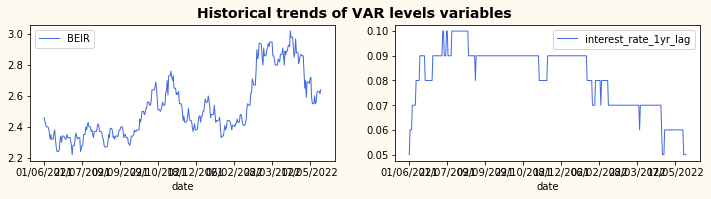

In [37]:
plot_vars(train_df, levels = ['BEIR', 'interest_rate_1yr_lag'], color="royalblue", leveltype="levels", name='levels1')

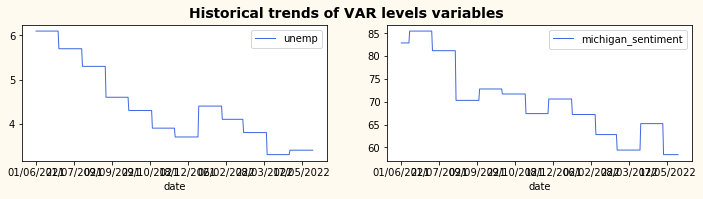

In [180]:
plot_vars(train_df, levels = ['unemp', 'michigan_sentiment'], color="royalblue", leveltype="levels", name='levels2')

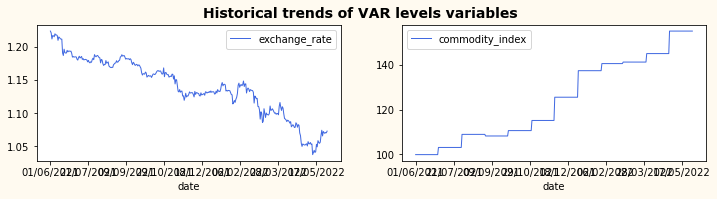

In [181]:
plot_vars(train_df, levels = ['exchange_rate', 'commodity_index'], color="royalblue", leveltype="levels", name='levels3')

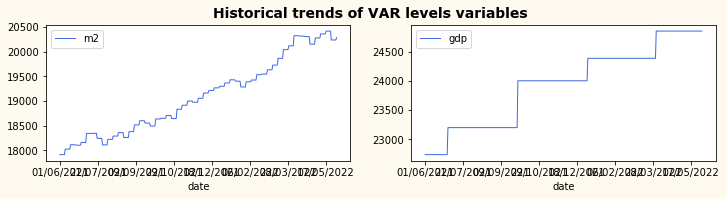

In [182]:
plot_vars(train_df, levels = ['m2', 'gdp'], color="royalblue", leveltype="levels", name='levels4')

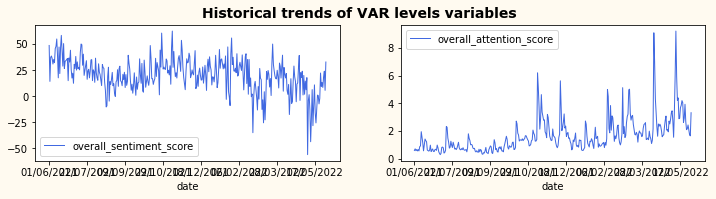

In [183]:
plot_vars(train_df, levels = ['overall_sentiment_score', 'overall_attention_score'], color="royalblue", leveltype="levels", name='levels5')

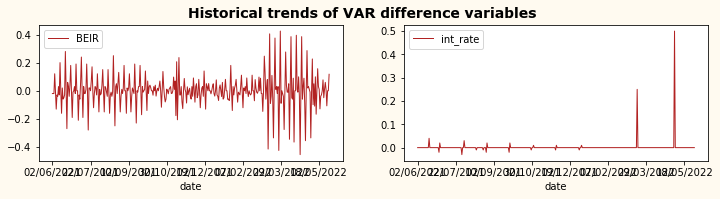

In [189]:
plot_vars(train_df_differenced, levels = ['BEIR', 'int_rate'], color="firebrick", leveltype="difference", name='difference1')

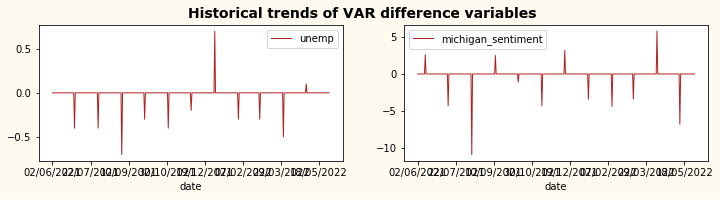

In [190]:
plot_vars(train_df_differenced, levels = ['unemp', 'michigan_sentiment'], color="firebrick", leveltype="difference", name='difference2')

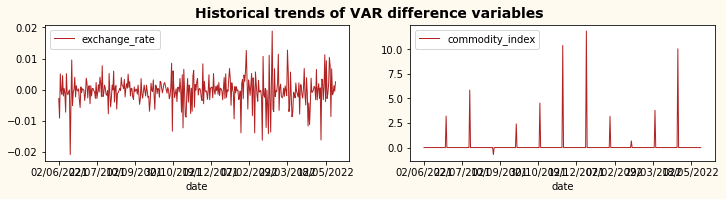

In [191]:
plot_vars(train_df_differenced, levels = ['exchange_rate', 'commodity_index'], color="firebrick", leveltype="difference", name='difference3')

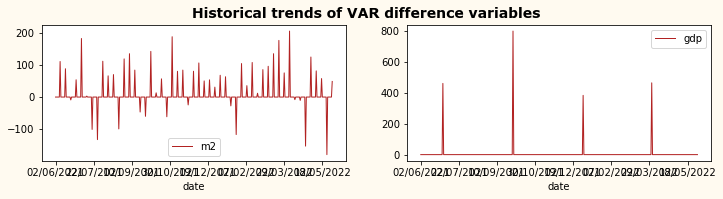

In [192]:
plot_vars(train_df_differenced, levels = ['m2', 'gdp'], color="firebrick", leveltype="difference", name='difference4')

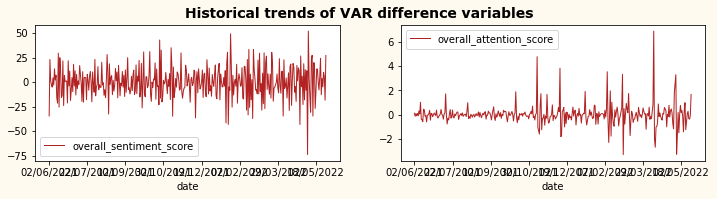

In [193]:
plot_vars(train_df_differenced, levels = ['overall_sentiment_score', 'overall_attention_score'], color="firebrick", leveltype="difference", name='difference5')

In [28]:
#Selecting appropriate lag

In [29]:
model = VAR(train_df_differenced)
for i in [1,2,3,4,5,6,7,8]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 1 lag

Lag Order = 1
AIC :  -10.512127204895451
BIC :  -9.686917211636453
FPE :  2.7207417703112142e-05
HQIC:  -10.183033913905081 

Lag Order = 2
AIC :  -10.330178429169129
BIC :  -8.767978734150155
FPE :  3.2656888509886265e-05
HQIC:  -9.707106888574105 

Lag Order = 3
AIC :  -10.13969588862401
BIC :  -7.837215491981267
FPE :  3.95727820573756e-05
HQIC:  -9.221269868710776 

Lag Order = 4
AIC :  -10.086202561713028
BIC :  -7.04012582553656
FPE :  4.187641725133188e-05
HQIC:  -8.87103545585548 

Lag Order = 5
AIC :  -10.027819538546492
BIC :  -6.234805930162348
FPE :  4.462108234532497e-05
HQIC:  -8.514514256106517 

Lag Order = 6
AIC :  -9.881412609888779
BIC :  -5.338096441718372
FPE :  5.205436581380382e-05
HQIC:  -8.068561467718691 

Lag Order = 7
AIC :  -9.756738079673502
BIC :  -4.4597282456145475
FPE :  5.9609522968082384e-05
HQIC:  -7.6429226921983675 

Lag Order = 8
AIC :  -9.60701845181109
BIC :  -3.5528981600835117
FPE :  7.02607253806887e-05
HQIC:  -7.190809619668578 



/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Aug, 2022
Time:                     11:15:44
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -9.68692
Nobs:                     332.000    HQIC:                  -10.1830
Log likelihood:          -1951.69    FPE:                2.72074e-05
AIC:                     -10.5121    Det(Omega_mle):     2.19663e-05
--------------------------------------------------------------------
Results for equation overall_sentiment_score_2wk_lag
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                     -0.112964         0.793918           -0.142           0.887
L1.overall_sentiment_score_2wk_lag        -0.394011 

In [31]:
#Checking for serial correlation#
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_df_differenced.columns, out):
    print(str(col), ':', round(val, 2))

overall_sentiment_score_2wk_lag : 2.21
overall_attention_score_2wk_lag : 2.04
BEIR : 2.03
interest_rate_1yr_lag : 1.98
commodities_1yr_lag : 2.0
UNRATENSA_1yr_lag : 2.0
UMCSENT_2wk_lag : 2.0
WM2NS_1yr_lag : 2.01


In [32]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced.values[-lag_order:]
forecast_input

1


array([[-2.37335000e+01, -9.76962744e-01,  0.00000000e+00,
        -1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [33]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=train_df.index[-nobs:], columns=train_df.columns + '_1d')
df_forecast

,overall_sentiment_score_2wk_lag_1d,overall_attention_score_2wk_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d
date,,,,,,,,
01/05/2022,11.540335,-0.213359,0.005880,0.000704,0.004518,-0.045021,-0.089956,-0.542453
02/05/2022,-4.506484,0.117573,-0.002219,-0.000204,0.137875,-0.014982,-0.052125,9.073060
03/05/2022,1.378459,-0.040863,0.002689,0.000041,0.137140,-0.017014,-0.053057,5.647379
04/05/2022,-0.595337,0.018554,0.000861,-0.000050,0.134234,-0.016590,-0.053767,7.094755
05/05/2022,0.045729,-0.001744,0.001492,-0.000018,0.134985,-0.016764,-0.053273,6.601312
06/05/2022,-0.160528,0.004954,0.001281,-0.000029,0.134830,-0.016702,-0.053471,6.760895
07/05/2022,-0.094416,0.002778,0.001350,-0.000025,0.134864,-0.016723,-0.053401,6.709666
08/05/2022,-0.115561,0.003479,0.001328,-0.000026,0.134856,-0.016716,-0.053425,6.726079
09/05/2022,-0.108807,0.003254,0.001335,-0.000026,0.134858,-0.016718,-0.053417,6.720830


In [34]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [35]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)

In [36]:
df_results
#.iloc[:,6:]

,overall_sentiment_score_2wk_lag_1d,overall_attention_score_2wk_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,overall_sentiment_score_2wk_lag_forecast,overall_attention_score_2wk_lag_forecast,BEIR_forecast,interest_rate_1yr_lag_forecast,commodities_1yr_lag_forecast,UNRATENSA_1yr_lag_forecast,UMCSENT_2wk_lag_forecast,WM2NS_1yr_lag_forecast
date,,,,,,,,,,,,,,,,
01/05/2022,11.540335,-0.213359,0.005880,0.000704,0.004518,-0.045021,-0.089956,-0.542453,4.635035,2.099527,2.885880,0.050704,145.045725,5.654979,65.110044,20149.657547
02/05/2022,-4.506484,0.117573,-0.002219,-0.000204,0.137875,-0.014982,-0.052125,9.073060,0.128551,2.217101,2.883662,0.050501,145.183600,5.639997,65.057919,20158.730606
03/05/2022,1.378459,-0.040863,0.002689,0.000041,0.137140,-0.017014,-0.053057,5.647379,1.507009,2.176237,2.886350,0.050541,145.320740,5.622983,65.004862,20164.377985
04/05/2022,-0.595337,0.018554,0.000861,-0.000050,0.134234,-0.016590,-0.053767,7.094755,0.911672,2.194791,2.887211,0.050491,145.454975,5.606393,64.951095,20171.472740
05/05/2022,0.045729,-0.001744,0.001492,-0.000018,0.134985,-0.016764,-0.053273,6.601312,0.957401,2.193047,2.888704,0.050473,145.589960,5.589628,64.897822,20178.074052
06/05/2022,-0.160528,0.004954,0.001281,-0.000029,0.134830,-0.016702,-0.053471,6.760895,0.796873,2.198001,2.889985,0.050445,145.724789,5.572926,64.844351,20184.834947
07/05/2022,-0.094416,0.002778,0.001350,-0.000025,0.134864,-0.016723,-0.053401,6.709666,0.702457,2.200779,2.891335,0.050420,145.859654,5.556203,64.790950,20191.544613
08/05/2022,-0.115561,0.003479,0.001328,-0.000026,0.134856,-0.016716,-0.053425,6.726079,0.586896,2.204258,2.892663,0.050393,145.994510,5.539487,64.737525,20198.270692
09/05/2022,-0.108807,0.003254,0.001335,-0.000026,0.134858,-0.016718,-0.053417,6.720830,0.478089,2.207512,2.893999,0.050367,146.129368,5.522769,64.684108,20204.991522


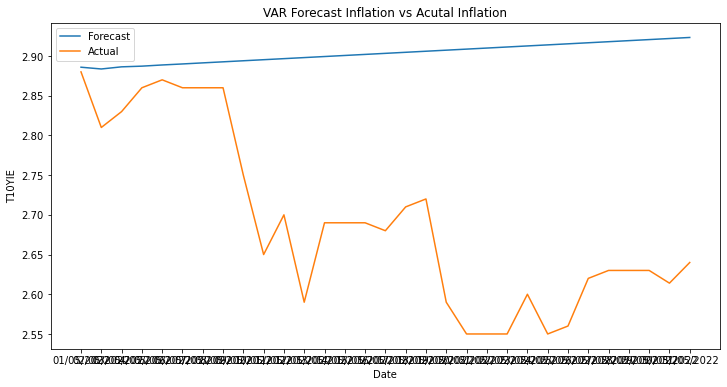

In [37]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [38]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [41]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)

0.24382518008689844

### LASSO Approach

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')

In [53]:
df_train.drop(['BEIR'],axis=1)
#df_test1

,overall_sentiment_score_2wk_lag,overall_attention_score_2wk_lag,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag
date,,,,,,,
01/06/2021,41.3202,0.730667,0.05,99.875276,11.2,82.9,17915.4
02/06/2021,38.0270,1.044432,0.06,99.875276,11.2,82.9,17915.4
03/06/2021,34.6892,0.843912,0.06,99.875276,11.2,82.9,17915.4
04/06/2021,32.3695,0.509602,0.06,99.875276,11.2,82.9,17915.4
05/06/2021,31.8013,0.534556,0.07,99.875276,11.2,82.9,17915.4
...,...,...,...,...,...,...,...
26/04/2022,11.3230,9.070342,0.07,145.041207,5.7,65.2,20150.2
27/04/2022,-17.5748,7.017218,0.07,145.041207,5.7,65.2,20150.2
28/04/2022,-1.6031,4.326948,0.07,145.041207,5.7,65.2,20150.2


In [54]:
X_train = df_train.drop(['BEIR'],axis=1)
y_train = df_train['BEIR']
X_test = df_test.drop(['BEIR'],axis=1)
y_test = df_test['BEIR']

In [57]:
def train_test_plot(model, X_train, X_test):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,4))
    colors = sns.color_palette("deep", 8)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])

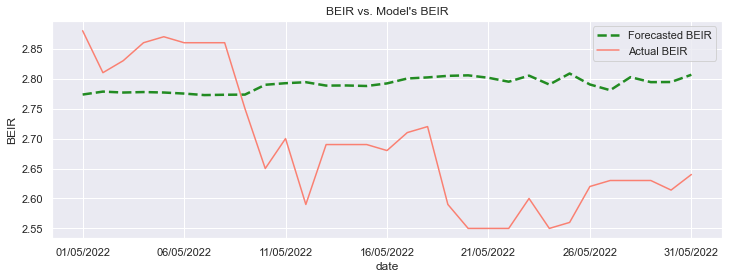

In [58]:
lasso = linear_model.LassoCV(cv=model_selection.TimeSeriesSplit(n_splits=5), 
                             alphas=None, tol = 10000, normalize=True) 

lasso = lasso.fit(X_train, y_train)
optimal_alpha = lasso.alpha_

lasso2 = linear_model.Lasso(alpha=optimal_alpha, normalize=True)
lasso2.fit(X_train, y_train)

train_test_plot(lasso2, X_train, X_test) 

In [59]:
metrics.mean_squared_error(y_test, lasso2.predict(X_test), squared = False)

0.15497940174168356

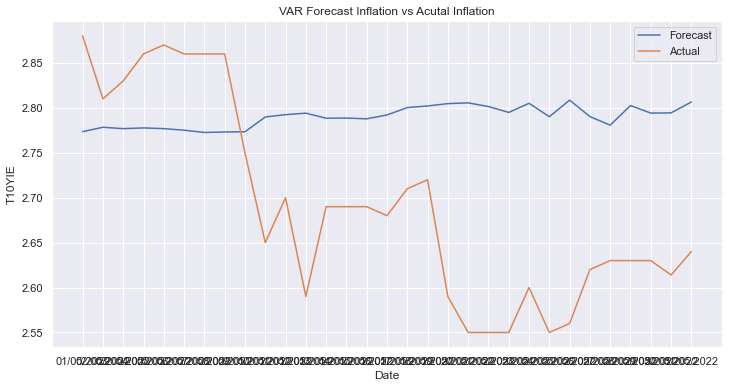

In [60]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, lasso2.predict(X_test), label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [61]:
lasso_coefs = pd.DataFrame({"features":list(X_train), "coef": lasso2.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.coef != 0.0]
lasso_coefs.sort_values("coef", ascending=False)

,features,coef
1,overall_attention_score_2wk_lag,0.005598
6,WM2NS_1yr_lag,0.000161
4,UNRATENSA_1yr_lag,-0.002276
2,interest_rate_1yr_lag,-2.083899


### XGBoost

In [62]:
#!pip install xgboost
from xgboost import XGBRegressor, plot_importance

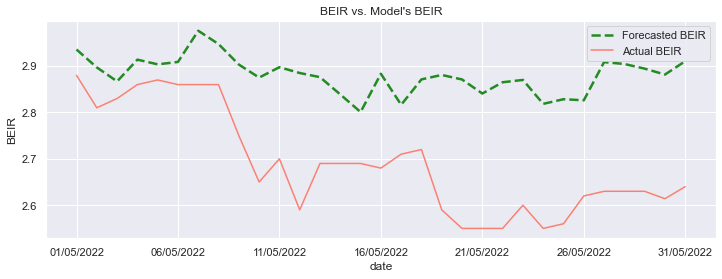

In [63]:
# Build XGBoost
# Normalize the features 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

train_test_plot(model=xgb, X_train=X_train_scaled, X_test=X_test_scaled)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

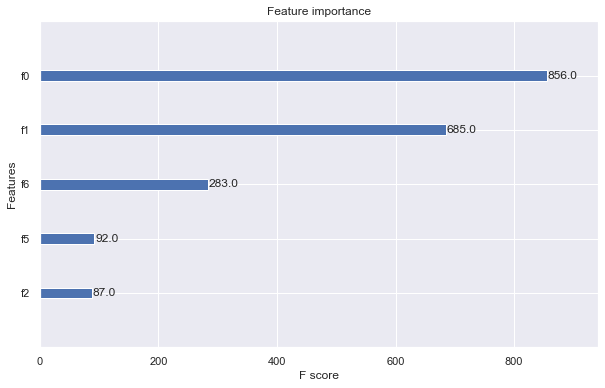

In [64]:
fig_xgb, ax_xgb = plt.subplots(figsize=(10,6))
plot_importance(xgb, max_num_features=5, ax=ax_xgb)

In [65]:
# Feature selection

for i, name in dict(zip(list(range(len(X_train.columns))), list(X_train.columns.values))).items():
    if i == 0:
        print(f"Feature {i} is {name}")
    elif i == 1:
        print(f"Feature {i} is {name}")
    elif i == 6:
        print(f"Feature {i} is {name}")
    elif i == 5:
        print(f"Feature {i} is {name}")
    elif i == 2:
        print(f"Feature {i} is {name}")

Feature 0 is overall_sentiment_score_2wk_lag
Feature 1 is overall_attention_score_2wk_lag
Feature 2 is interest_rate_1yr_lag
Feature 5 is UMCSENT_2wk_lag
Feature 6 is WM2NS_1yr_lag


In [66]:
metrics.mean_squared_error(y_test, xgb.predict(X_test), squared = False)

0.10960459295336343

In [ ]:
#Overall, traditional method performs best - then XGBoost then LASSO
#Although LASSO and XGBoost agree that unemp, int_rate, michigan_sentiment,
#and overall_attention_score are most important, they both perform worse than 
#the traditional, vanilla VAR model that also includes overall_sentiment_score